In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# 2 Point Curve

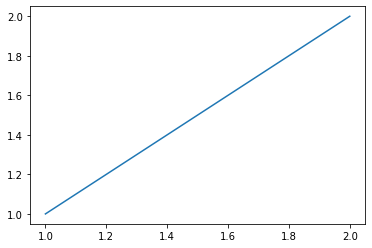

In [2]:
t = np.linspace(0, 1, 20)

p0 = np.array([1, 1]).reshape((-1, 1))
p1 = np.array([2, 2]).reshape((-1, 1))

curve = (1 - t) * p0 + t * p1 
xs = curve[0]
ys = curve[1]

plt.plot(xs, ys)

# Recursive Definition

In [3]:
def bezier_curve(points, t):
    """ Returns the bezier curve given contorl points
    
    Args: 
        points: A list of 2D points.
        t: The sampling density of the curve.
    """
    
    if len(points) == 2:
        curve = (1 - t) * points[0] + t * points[1] 
        return curve
    
    else: 
        left_influence = (1 - t) * bezier_curve(points[:-1], t) 
        right_influence = t * bezier_curve(points[1:], t)
        curve = left_influence + right_influence
        return curve

# 4 Point Curve

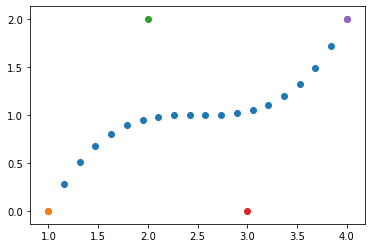

In [4]:
p0 = np.array([1, 0]).reshape((-1, 1))
p1 = np.array([2, 2]).reshape((-1, 1))
p2 = np.array([3, 0]).reshape((-1, 1))
p3 = np.array([4, 2]).reshape((-1, 1))

points = [p0, p1, p2, p3]
curve = bezier_curve(points, t)
xs = curve[0]
ys = curve[1]

plt.scatter(xs, ys)
for point in points: 
    plt.scatter(point[0], point[1])

# Gradient Vector Plot

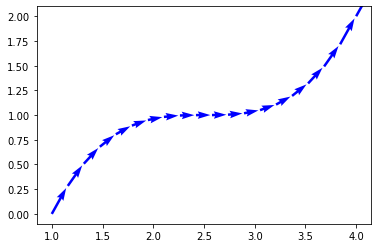

In [5]:
diff = curve[:, 1:] - curve[:, :-1]
plt.quiver(curve[0], curve[1], diff[0], diff[1], color='b')

# Normalize Sampling by Subsampling

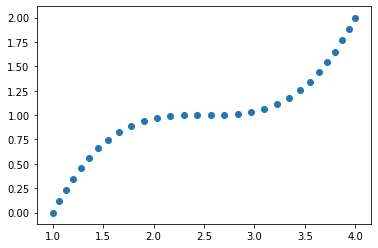

In [6]:
t = np.linspace(0, 1, 10_000)

curve = bezier_curve(points, t)

diff = curve[:, 1:] - curve[:, :-1]
diff_len = np.linalg.norm(diff, axis=0)
cum_diff_len = np.cumsum(diff_len)
curve_len = diff_len.sum()

sub_t = np.linspace(0, curve_len, 30)
sub_idx = [np.argmin(abs(cum_diff_len - dist)) for dist in sub_t]
sub_curve = curve[:, sub_idx]

plt.scatter(sub_curve[0], sub_curve[1])

# Subsample statistics

In [7]:
t = np.linspace(0, 1, 30)
orig_curve = bezier_curve(points, t)

diff1 = orig_curve[:, 1:] - orig_curve[:, :-1]
diff2 = sub_curve[:, 1:] - sub_curve[:, :-1]
len1 = np.linalg.norm(diff1, axis=0)
len2 = np.linalg.norm(diff2, axis=0)

print('The variance in point distances')
print('original curve: {:.2e}'.format(len1.var()))
print('subsampled curve: {:.2e}'.format(len2.var()))
print()
print('The gap between smallest and largest length')
print('original curve: {:.2e}'.format(len1.max() - len1.min()))
print('subsampled curve: {:.2e}'.format(len2.max() - len2.min()))

The variance in point distances
original curve: 1.34e-03
subsampled curve: 4.00e-08

The gap between smallest and largest length
original curve: 1.15e-01
subsampled curve: 1.01e-03


# Rotate Curve
A bezier curve can be rotated by rotating the control points

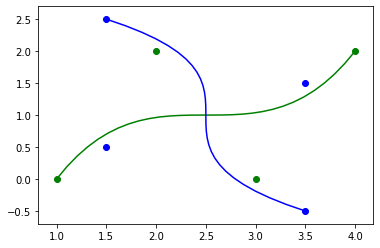

In [8]:
t = np.linspace(0, 1, 30)
curve = bezier_curve(points, t)

theta = np.radians(90)
rot_mat = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])

center_of_mass = np.array(points).mean(axis=0)
rot_points = [center_of_mass + np.matmul(rot_mat, point - center_of_mass) for point in points]
rot_curve = bezier_curve(rot_points, t)

# Cast lists to numpy arrays to ease scatter plotting
rot_points = np.array(rot_points)
points = np.array(points)

plt.plot(curve[0], curve[1], c='g')
plt.scatter(points[:, 0], points[:, 1], c='g')

plt.plot(rot_curve[0], rot_curve[1], c='b')
plt.scatter(rot_points[:, 0], rot_points[:, 1], color='b')

# Explicit defintion

$$ B(t) = \sum^{n}_{i=0} \binom{n}{i}(1- t)^{n-1} t^i P_{i}$$   
    
Or 
    
$$ B(t) = \sum^{n}_{i=0} b_{i,n} P_{i}$$
where $b_{i,n}$ is the Bernstein polynomial.
$$b_{i,n} = \binom{n}{i}(1- t)^{n-1} t^i$$

In [9]:
def bernstein_polynomail(i, n, t):
    binomial = binom(n, i)
    return binomial * ((1 - t)**(n - i))  * (t**i)

def bezier_curve(points, t):
    influences = list()
    n = len(points) - 1
    
    for idx, point in enumerate(points):
        b = bernstein_polynomail(idx, n, t)
        point_influence = b * point
        influences.append(point_influence)
    
    influences = np.array(influences)
    curve = influences.sum(axis=0)
    return curve

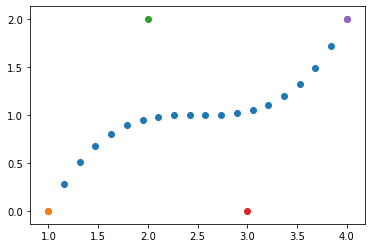

In [10]:
t = np.linspace(0, 1, 20)

p0 = np.array([1, 0]).reshape((-1, 1))
p1 = np.array([2, 2]).reshape((-1, 1))
p2 = np.array([3, 0]).reshape((-1, 1))
p3 = np.array([4, 2]).reshape((-1, 1))

points = [p0, p1, p2, p3]
curve = bezier_curve(points, t)

xs = curve[0]
ys = curve[1]

plt.scatter(xs, ys)
for point in points: 
    plt.scatter(point[0], point[1])